In [ ]:
### https://stackoverflow.com/questions/35809554/how-to-download-google-image-search-results-in-python

In [2]:



import pandas as pd


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


import time
from collections import Counter
import datetime
from skimage import io       
from icrawler.builtin import GoogleImageCrawler

import PIL
from PIL import Image


In [3]:
keyword='iphone11'
path="C:/Users/taras/Desktop/histolines/data/general image/data/"+keyword

In [4]:
google_crawler = GoogleImageCrawler(storage={'root_dir': path})
google_crawler.crawl(keyword=keyword, max_num=100)




2019-11-17 17:07:56,547 - INFO - icrawler.crawler - start crawling...
2019-11-17 17:07:56,550 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-11-17 17:07:56,554 - INFO - feeder - thread feeder-001 exit
2019-11-17 17:07:56,556 - INFO - icrawler.crawler - starting 1 parser threads...
2019-11-17 17:07:56,559 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-11-17 17:07:57,893 - INFO - parser - parsing result page https://www.google.com/search?q=iphone11&ijn=0&start=0&tbs=&tbm=isch
2019-11-17 17:07:57,974 - INFO - downloader - skip downloading file 000001.jpg
2019-11-17 17:07:57,976 - INFO - downloader - skip downloading file 000002.jpg
2019-11-17 17:07:57,977 - INFO - downloader - skip downloading file 000003.jpg
2019-11-17 17:07:57,978 - INFO - downloader - skip downloading file 000004.jpg
2019-11-17 17:07:57,980 - INFO - downloader - skip downloading file 000005.jpg
2019-11-17 17:07:57,980 - INFO - downloader - skip downloading file 000006.jpg
2019-11-17 17

2019-11-17 17:08:03,742 - INFO - downloader - skip downloading file 000088.jpg
2019-11-17 17:08:03,744 - INFO - downloader - skip downloading file 000089.jpg
2019-11-17 17:08:03,745 - INFO - downloader - skip downloading file 000090.jpg
2019-11-17 17:08:03,747 - INFO - downloader - skip downloading file 000091.jpg
2019-11-17 17:08:03,748 - INFO - downloader - skip downloading file 000092.jpg
2019-11-17 17:08:03,750 - INFO - downloader - skip downloading file 000093.jpg
2019-11-17 17:08:03,751 - INFO - downloader - skip downloading file 000094.jpg
2019-11-17 17:08:03,752 - INFO - downloader - skip downloading file 000095.jpg
2019-11-17 17:08:03,753 - INFO - downloader - skip downloading file 000096.jpg
2019-11-17 17:08:03,754 - INFO - downloader - skip downloading file 000097.jpg
2019-11-17 17:08:03,756 - INFO - downloader - skip downloading file 000098.jpg
2019-11-17 17:08:04,034 - INFO - downloader - image #99	https://shop.r10s.jp/blade/cabinet/topimage02/ipxi-cp03-w90902.jpg
2019-11-

In [5]:
import glob
####https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688

files = glob.glob(path+'/*')
##df = pd.concat([pd.read_csv(f) for f in glob.glob(path+'/*')], ignore_index = True)

In [6]:

folders = glob.glob('C:/Users/taras/Desktop/histolines/data/general image/data/*')
folders

['C:/Users/taras/Desktop/histolines/data/general image/data\\cat',
 'C:/Users/taras/Desktop/histolines/data/general image/data\\iphone11']

In [7]:
df = pd.DataFrame()
df['image_path']=files

C:/Users/taras/Desktop/histolines/data/general image/data/iphone11/000011.jpg


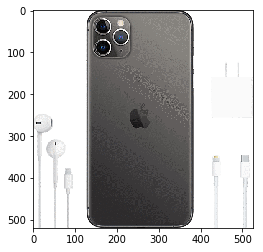

In [8]:
### Example
name=df['image_path'][10].replace("\\", "/", 1)
print (name)
img = io.imread(name+'')
plt.imshow(img)

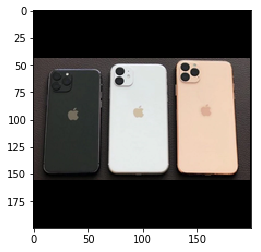

In [9]:
### example of one resizing


desired_size = 200
name=df['image_path'][11].replace("\\", "/", 1)
im=Image.open(name)
##plt.imshow(img)

####https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/

old_size = im.size  # old_size[0] is in (width, height) format
ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
# use thumbnail() or resize() method to resize the input image

# thumbnail is a in-place operation

# im.thumbnail(new_size, Image.ANTIALIAS)

im = im.resize(new_size, Image.ANTIALIAS)
# create a new image and paste the resized on it

new_im = Image.new("RGB", (desired_size, desired_size))
new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
plt.imshow(new_im)

C:\Anaconda\envs\tensorflow_gpuenv\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


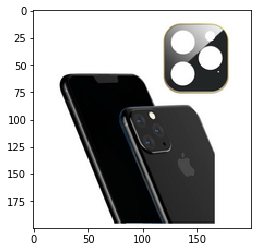

In [10]:
### looping though all images by keyword

desired_size = 200
images_data=[]
cat=[]
for name in df['image_path']:
    name=name.replace("\\", "/", 1)
    im=Image.open(name)
    ##print (name)
    old_size = im.size  # old_size[0] is in (width, height) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)

    im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))
    images_data.append(np.array(new_im))
    cat.append(keyword)
    plt.imshow(new_im)

In [11]:
##plt.imshow(images_data[7])

In [12]:
df['cat']=cat
df['images_data']=images_data

In [13]:
df.head()

,image_path,cat,images_data
0,C:/Users/taras/Desktop/histolines/data/general...,iphone11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,C:/Users/taras/Desktop/histolines/data/general...,iphone11,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,C:/Users/taras/Desktop/histolines/data/general...,iphone11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,C:/Users/taras/Desktop/histolines/data/general...,iphone11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,C:/Users/taras/Desktop/histolines/data/general...,iphone11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


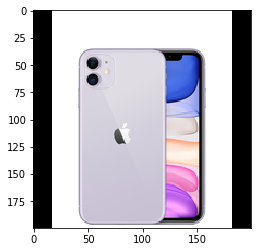

In [14]:
i=8
##print(images_data[i])
plt.imshow(df['images_data'][i])

In [15]:
def download_images(keyword,max_num):
   ## keyword='cat'
    path="C:/Users/taras/Desktop/histolines/data/general image/data/"+keyword
    #### Download images
    google_crawler = GoogleImageCrawler(storage={'root_dir': path})
    google_crawler.crawl(keyword=keyword, max_num=max_num)

    files = glob.glob(path+'/*')
    df = pd.DataFrame()
    df['image_path']=files

    ### looping though all images by keyword

    desired_size = 200
    images_data=[]
    cat=[]
    for name in df['image_path']:
        name=name.replace("\\", "/", 1)
        im=Image.open(name)
        ##print (name)
        old_size = im.size  # old_size[0] is in (width, height) format
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        # use thumbnail() or resize() method to resize the input image

        # thumbnail is a in-place operation

        # im.thumbnail(new_size, Image.ANTIALIAS)

        im = im.resize(new_size, Image.ANTIALIAS)
        # create a new image and paste the resized on it

        new_im = Image.new("RGB", (desired_size, desired_size))
        new_im.paste(im, ((desired_size-new_size[0])//2,
                            (desired_size-new_size[1])//2))
        images_data.append(np.array(new_im))
        cat.append(keyword)
        plt.imshow(new_im)
    df['cat']=cat
    df['images_data']=images_data
    return df

df.head()

i=10
##print(images_data[i])
plt.imshow(df['images_data'][i])

2019-11-17 17:08:32,281 - INFO - icrawler.crawler - start crawling...
2019-11-17 17:08:32,283 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-11-17 17:08:32,286 - INFO - feeder - thread feeder-001 exit
2019-11-17 17:08:32,291 - INFO - icrawler.crawler - starting 1 parser threads...
2019-11-17 17:08:32,297 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-11-17 17:08:32,770 - INFO - parser - parsing result page https://www.google.com/search?q=cat&ijn=0&start=0&tbs=&tbm=isch
2019-11-17 17:08:32,822 - INFO - downloader - skip downloading file 000001.jpg
2019-11-17 17:08:34,122 - INFO - downloader - image #2	https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png
2019-11-17 17:08:34,285 - INFO - downloader - image #3	https://www.gannett-cdn.com/presto/2019/11/14/PSAL/b23f78ae-5321-40ec-aa25-dfce9e639ddd-Liberty.jpg?crop=3263,2447,x0,y0&width=640
2019-11-17 17:08:34,287 - INFO - downloader - skip downloading file 000004.jpg
2019-11-17 17:08:34,28

2019-11-17 17:08:39,821 - INFO - downloader - skip downloading file 000087.jpg
2019-11-17 17:08:39,950 - INFO - downloader - image #88	https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2019/09/931/524/FatCat1Istock.jpg?ve=1&tl=1
2019-11-17 17:08:41,324 - INFO - downloader - image #89	https://www.argospetinsurance.co.uk/assets/uploads/2017/10/pexels-photo-416160.jpeg
2019-11-17 17:08:41,327 - INFO - downloader - skip downloading file 000090.jpg
2019-11-17 17:08:41,328 - INFO - downloader - skip downloading file 000091.jpg
2019-11-17 17:08:41,329 - INFO - downloader - skip downloading file 000092.jpg
2019-11-17 17:08:41,330 - INFO - downloader - skip downloading file 000093.jpg
2019-11-17 17:08:41,331 - INFO - downloader - skip downloading file 000094.jpg
2019-11-17 17:08:42,665 - INFO - downloader - image #95	http://mewhavencatcafe.com/uploads/8/8/6/1/88610798/jack-stretch-back_orig.jpg
2019-11-17 17:08:42,668 - INFO - downloader - skip downloading file 000096.jpg
2

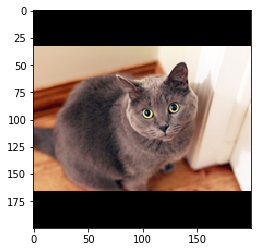

In [16]:
df=download_images('cat',100)
df_full=df

2019-11-17 17:08:54,413 - INFO - icrawler.crawler - start crawling...
2019-11-17 17:08:54,414 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-11-17 17:08:54,415 - INFO - feeder - thread feeder-001 exit
2019-11-17 17:08:54,417 - INFO - icrawler.crawler - starting 1 parser threads...
2019-11-17 17:08:54,420 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-11-17 17:08:55,219 - INFO - parser - parsing result page https://www.google.com/search?q=iphone11&ijn=0&start=0&tbs=&tbm=isch
2019-11-17 17:08:55,275 - INFO - downloader - skip downloading file 000001.jpg
2019-11-17 17:08:55,278 - INFO - downloader - skip downloading file 000002.jpg
2019-11-17 17:08:55,278 - INFO - downloader - skip downloading file 000003.jpg
2019-11-17 17:08:55,280 - INFO - downloader - skip downloading file 000004.jpg
2019-11-17 17:08:55,281 - INFO - downloader - skip downloading file 000005.jpg
2019-11-17 17:08:55,282 - INFO - downloader - skip downloading file 000006.jpg
2019-11-17 17

2019-11-17 17:08:59,124 - INFO - downloader - skip downloading file 000094.jpg
2019-11-17 17:08:59,125 - INFO - downloader - skip downloading file 000095.jpg
2019-11-17 17:08:59,127 - INFO - downloader - skip downloading file 000096.jpg
2019-11-17 17:08:59,443 - INFO - downloader - image #97	https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/IPhone_11_White.svg/1200px-IPhone_11_White.svg.png
2019-11-17 17:08:59,450 - INFO - downloader - skip downloading file 000098.jpg
2019-11-17 17:08:59,454 - INFO - downloader - skip downloading file 000099.jpg
2019-11-17 17:09:01,125 - INFO - parser - no more page urls for thread parser-001 to parse
2019-11-17 17:09:01,127 - INFO - parser - thread parser-001 exit
2019-11-17 17:09:04,456 - INFO - downloader - no more download task for thread downloader-001
2019-11-17 17:09:04,456 - INFO - downloader - thread downloader-001 exit
2019-11-17 17:09:05,430 - INFO - icrawler.crawler - Crawling task done!


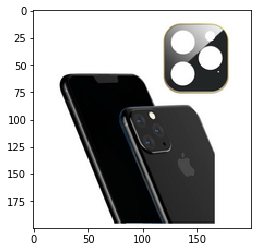

In [17]:
df=download_images("iphone11",100)
df_full =pd.concat([df_full, df], ignore_index=True)

In [18]:
df_full.describe()

,image_path,cat,images_data
count,296,296,296
unique,296,2,296
top,C:/Users/taras/Desktop/histolines/data/general...,iphone11,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
freq,1,169,1


In [19]:
import pickle   

In [20]:
import pickle   
output = open('image_dataframe.pkl', 'wb')
pickle.dump(df_full, output)
output.close()  